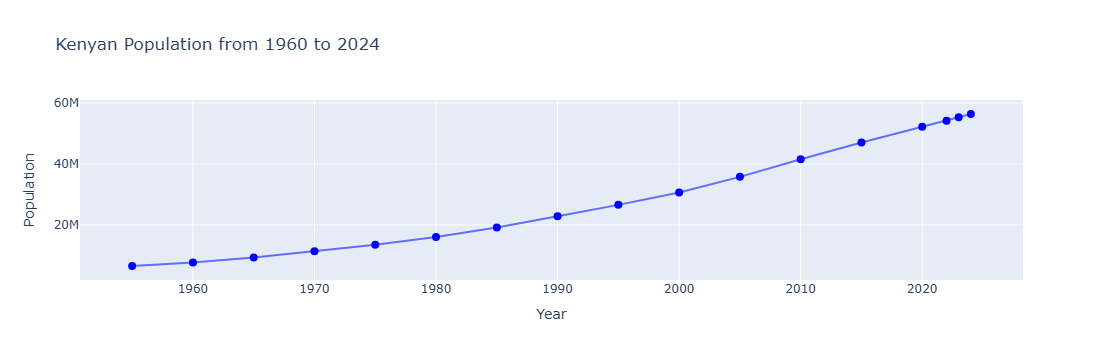

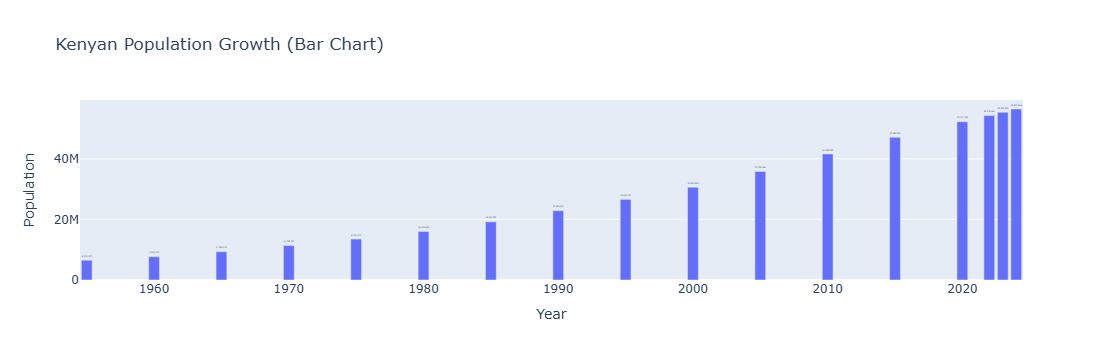

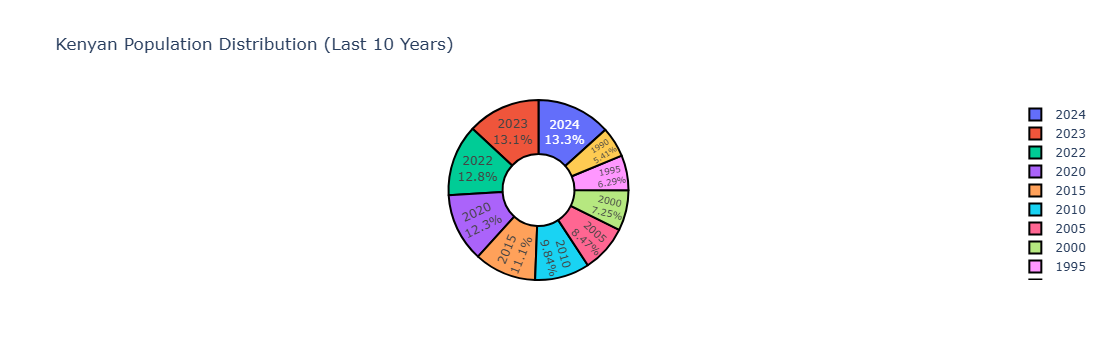

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# URL to scrape
url = "https://www.worldometers.info/world-population/kenya-population/"

# Send a GET request to the website
response = requests.get(url)

# Parse the content of the request with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table that contains the population data
table = soup.find('table', attrs={"class": "table table-striped table-bordered table-hover table-condensed table-list"})

# Extract table rows
rows = table.find_all('tr')

# List to hold the data
data = []

# Iterate through the rows and extract the year and population
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    year = int(cols[0].text.strip())  # Year column
    population = int(cols[1].text.strip().replace(',', ''))  # Population column, remove commas
    data.append([year, population])

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=['Year', 'Population'])

# Sort the DataFrame by year (ascending order)
df = df.sort_values(by='Year')

# Line Chart with Hover Tooltips
line_chart = px.line(df, x='Year', y='Population', title='Kenyan Population from 1960 to 2024',
                     labels={'Year': 'Year', 'Population': 'Population'},
                     hover_data={'Population': ':,'})  # Add hover data to show population with commas

line_chart.update_traces(marker=dict(size=8, symbol='circle', color='blue'), mode='lines+markers')

# Bar Chart with Hover Tooltips
bar_chart = px.bar(df, x='Year', y='Population', title='Kenyan Population Growth (Bar Chart)',
                   labels={'Year': 'Year', 'Population': 'Population'},
                   hover_data={'Population': ':,'}, text='Population')  # Add hover data to show population with commas

bar_chart.update_traces(texttemplate='%{text:,}', textposition='outside')

# Pie Chart with Population Segments for Recent Years
# Select the last 10 years from the DataFrame for the pie chart
pie_df = df.tail(10)

pie_chart = px.pie(pie_df, values='Population', names='Year', title='Kenyan Population Distribution (Last 10 Years)',
                   hover_data=['Population'], labels={'Population': 'Population'},
                   hole=0.4)  # Create a donut-style pie chart

pie_chart.update_traces(textposition='inside', textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2)))

# Show the three charts

line_chart.show()
bar_chart.show()
pie_chart.show()
